## import

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

sys.path.append("../Lib")
from doublewell1 import DoubleWell
from flow import BG_RealNVP
from mcmc import  MetropolisGauss
from plot import plot_forward_backward_2d

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
model=DoubleWell()

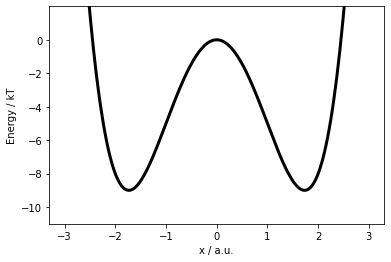

In [5]:
_=model.plot_dimer_energy()

In [6]:
nsteps = 500000
stride = 10
noise=0.05
burnin=100000
xl=np.array([-2,0])
xr=np.array([2,0])

In [7]:
sampler_l = MetropolisGauss(model, xl, noise=noise, burnin=burnin, stride=stride)
sampler_l.run(nsteps)

In [8]:
sampler_r = MetropolisGauss(model, xr, noise=noise, burnin=burnin, stride=stride)
sampler_r.run(nsteps)

In [9]:
xl=sampler_l.traj
xr=sampler_r.traj

In [10]:
x_brute=np.vstack((xl,xr))
x_brute.shape

(80000, 2)

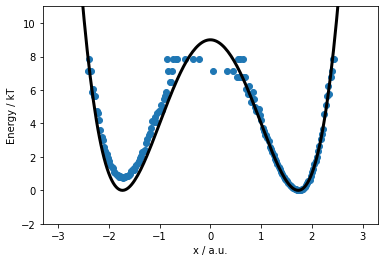

In [11]:
_=model.plot_sample_energy(x_brute)

Text(0.5, 1.0, '$X = g(z)$')

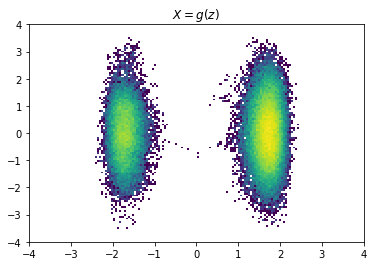

In [12]:
ax=plt.gca()
ax.hist2d(x_brute[:,0],x_brute[:,1],bins=100,norm=matplotlib.colors.LogNorm())
#plt.scatter(x[:, 0], x[:, 1], c='r') # x[:, 0, 0] is x1 coordinates of all samples 
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title(r'$X = g(z)$')

## BG

In [13]:
model_BG=BG_RealNVP(model,dim=model.dim)

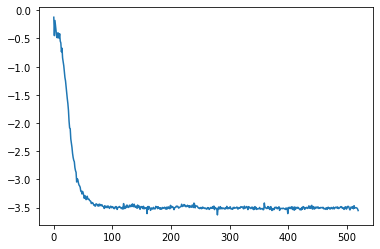

In [14]:
loss=model_BG.train_mix(x_brute,iter=500,lr=1e-4,batch_size=2048)
plt.plot(loss)
plt.show()

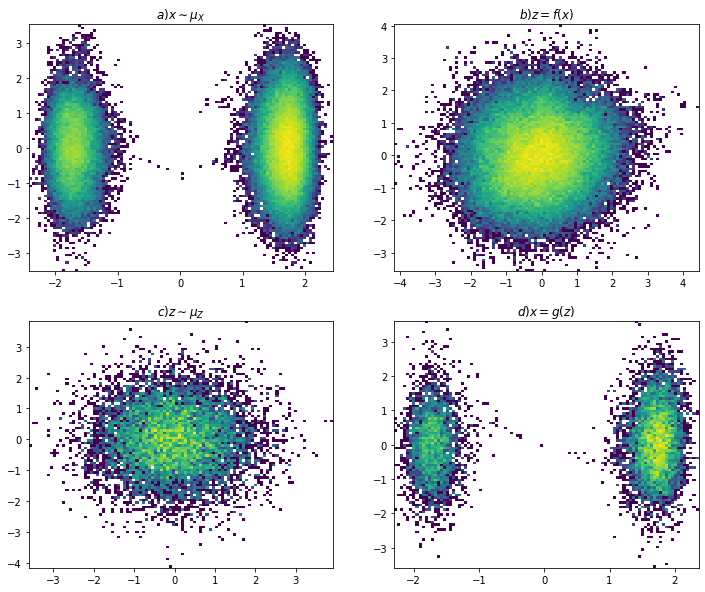

In [17]:
plot_forward_backward_2d(model_BG,x_brute,10000)